In [21]:
import pandas as pd 
import matplotlib.pyplot as plt

import sys
sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")
plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

In [22]:
df = pd.read_csv('train_ben.csv')

In [23]:
df.describe()

,Unnamed: 0,E_coh (MPa),T_g (K),R_gyr (A^2),Densities (kg/m^3),E_coh_bin,T_g_bin,R_gyr_bin,Densities_bin,smiles_lenght
count,410.000000,410.000000,410.000000,4.100000e+02,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,204.500000,560.195630,317.878114,1.313937e-19,1129.886987,0.500000,0.500000,0.500000,0.500000,29.800000
std,118.501055,154.255325,54.945007,1.633922e-19,157.443424,0.500611,0.500611,0.500611,0.500611,13.866602
min,0.000000,48.359557,196.493712,1.383725e-20,157.166117,0.000000,0.000000,0.000000,0.000000,4.000000
25%,102.250000,471.353107,278.700144,7.201439e-20,1045.068583,0.000000,0.000000,0.000000,0.000000,21.000000
50%,204.500000,550.250058,319.636715,9.704992e-20,1132.256118,0.500000,0.500000,0.500000,0.500000,26.000000
75%,306.750000,629.562207,360.126148,1.494501e-19,1196.112755,1.000000,1.000000,1.000000,1.000000,36.000000
max,409.000000,1325.912207,754.456201,2.264474e-18,1842.109784,1.000000,1.000000,1.000000,1.000000,85.000000


In [24]:
df_properties = df[['E_coh (MPa)', 'T_g (K)', 'R_gyr (A^2)','Densities (kg/m^3)']]
df_properties.median()

E_coh (MPa)           5.502501e+02
T_g (K)               3.196367e+02
R_gyr (A^2)           9.704992e-20
Densities (kg/m^3)    1.132256e+03
dtype: float64

# Plot histogram

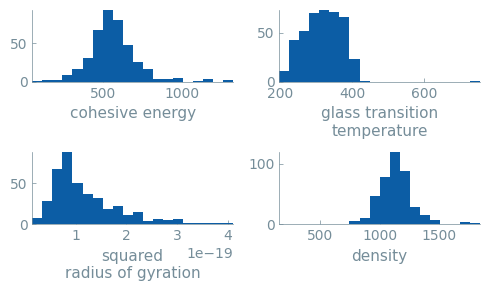

In [25]:
titles = {'E_coh (MPa)': 'cohesive energy', 
          'T_g (K)': 'glass transition\ntemperature', 
          'R_gyr (A^2)': 'squared\nradius of gyration',
          'Densities (kg/m^3)': 'density'}

fig, axes = plt.subplots(2,2, tight_layout = True, figsize = (5,3))

for i, prop in zip(axes.flatten(), list(df_properties.columns)):
    if prop == 'R_gyr (A^2)':
        i.hist([i for i in df_properties[prop] if i < 0.5e-18], bins = 20)
    else:
        i.hist(df_properties[prop], bins = 20)
    i.set_xlabel(titles[prop])

plt.savefig('monomers_histograms.pdf', bbox_inches = 'tight')

In [26]:
df.to_csv('train_ben.csv')